In [384]:
from sqlalchemy.dialects.mssql.information_schema import columns
!pip install xlrd

In [385]:
import pandas as pd

clients = pd.read_excel("C:\\Users\\admin\\OneDrive - Auckland Institute of Studies\\Documents\\AIS\\AI\\DataSet\\default_credit_card_clients\\default_credit_card_clients.xls")
print(len(clients))
clients.head()

30000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [386]:
clients.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [387]:
#Dependent variable

clients['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [388]:
clients.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [389]:
clients[clients['default']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [390]:
clients[clients['default']==1].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,8571.616622,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7408.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14758.500000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,21831.750000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


<Axes: xlabel='default', ylabel='count'>

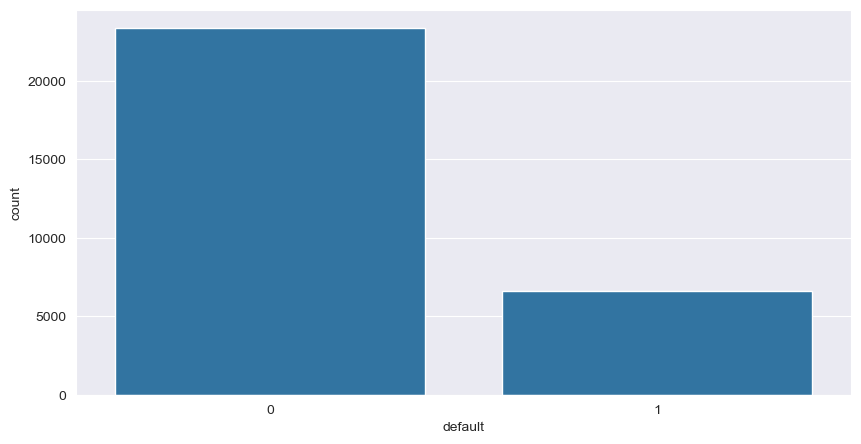

In [391]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='default', data=clients)

In [392]:
#Independent Variable

#categorical feature
clients['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [393]:
clients['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [394]:
filter_data = (clients['EDUCATION']==5) | (clients['EDUCATION']==6) | (clients['EDUCATION']==0)
clients.loc[filter_data, 'EDUCATION'] = 4
clients['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [395]:
clients['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [396]:
filter_data = (clients['MARRIAGE']==0)
clients.loc[filter_data, 'MARRIAGE'] = 3
clients['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [397]:
#Plotting
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

clients_cat = clients[categorical_features]
clients_cat.insert(3,'default',clients['default'])

<Figure size 1000x500 with 0 Axes>

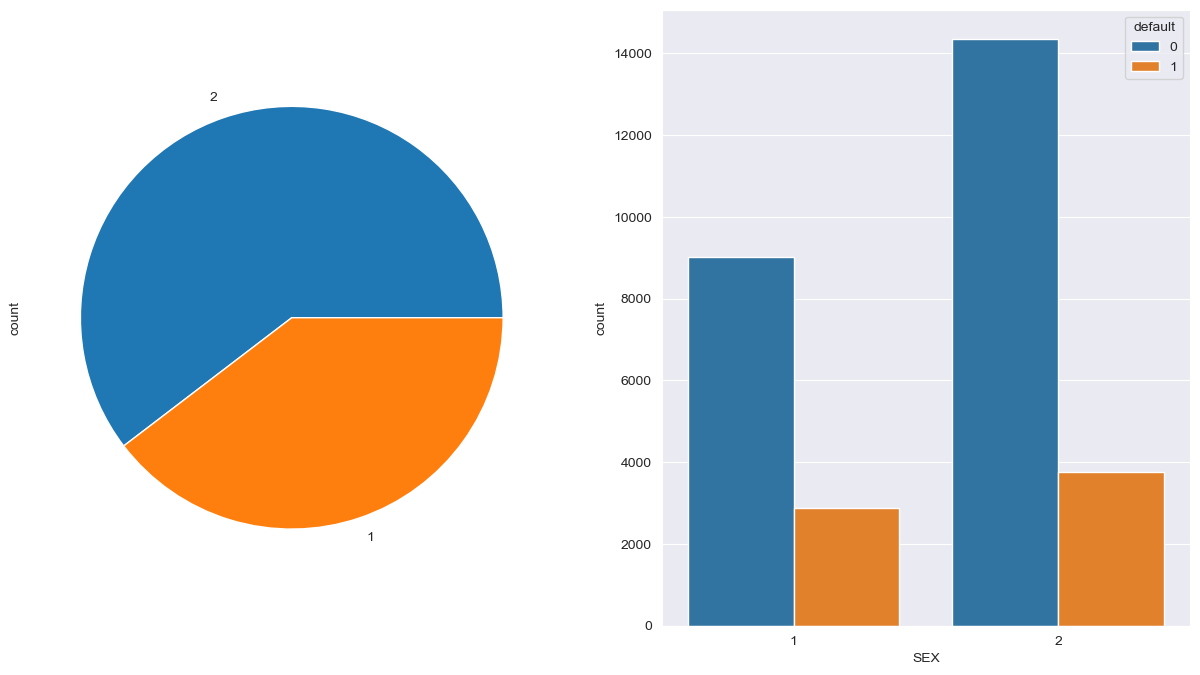

<Figure size 1000x500 with 0 Axes>

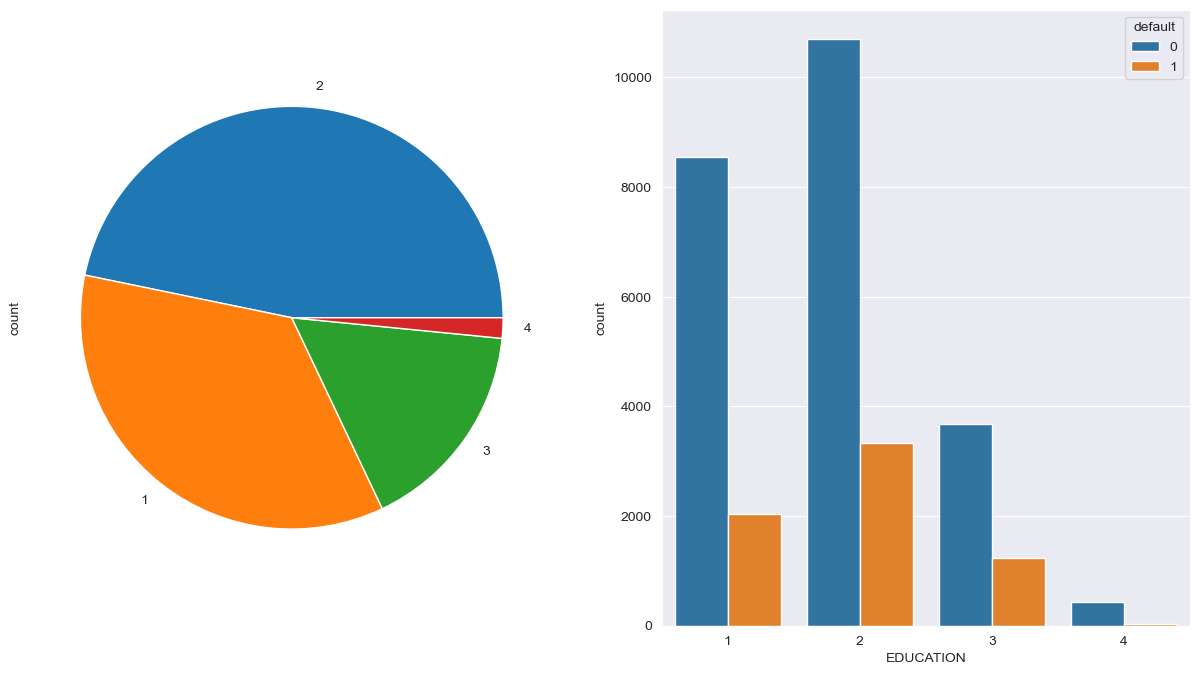

<Figure size 1000x500 with 0 Axes>

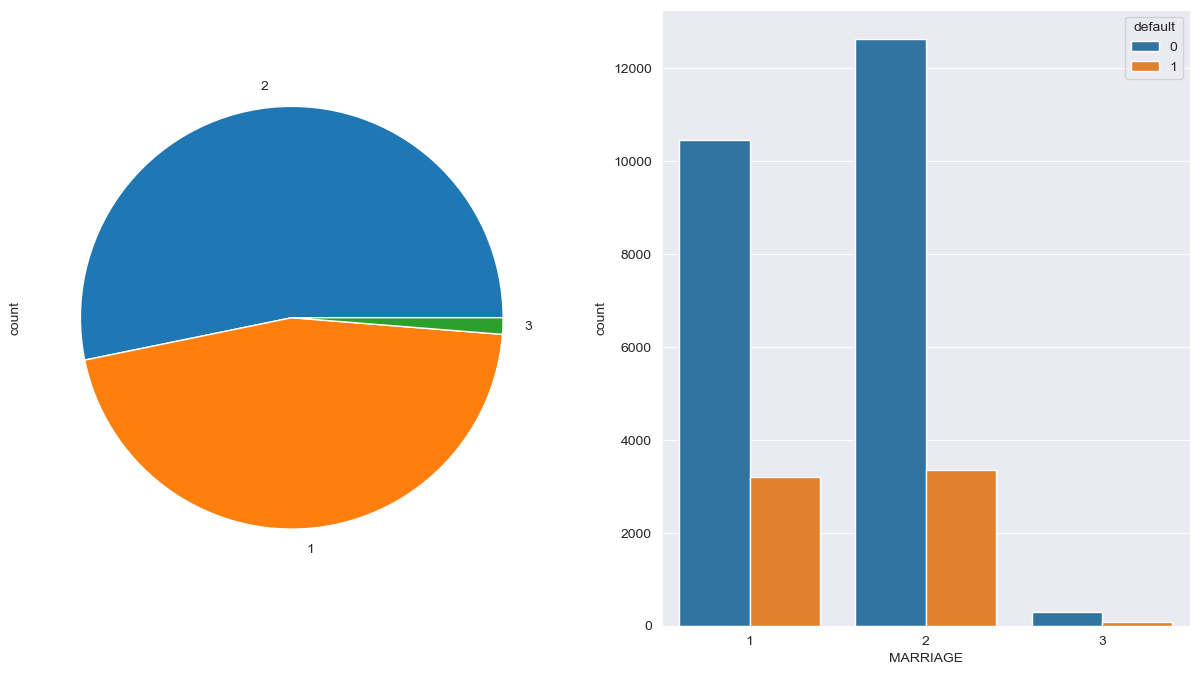

In [398]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
    clients[col].value_counts().plot(kind='pie',ax=axes[0], subplots=True)
    sns.countplot(x=col, hue='default', data=clients_cat)

In [399]:
# > more female
# > more educated more default
# > single tends to default

In [400]:
# Limit Balance

clients['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='default', ylabel='LIMIT_BAL'>

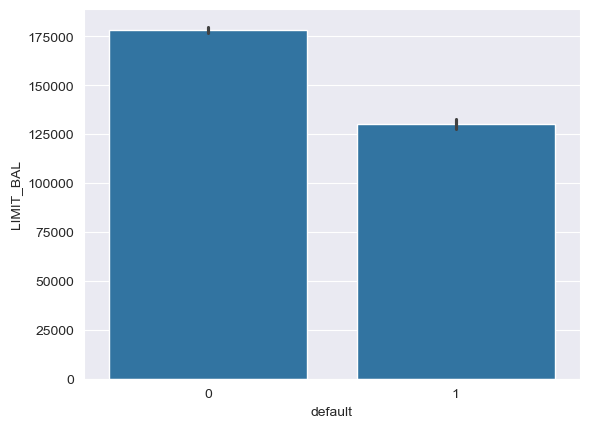

In [401]:
sns.barplot(x='default', y='LIMIT_BAL', data=clients)

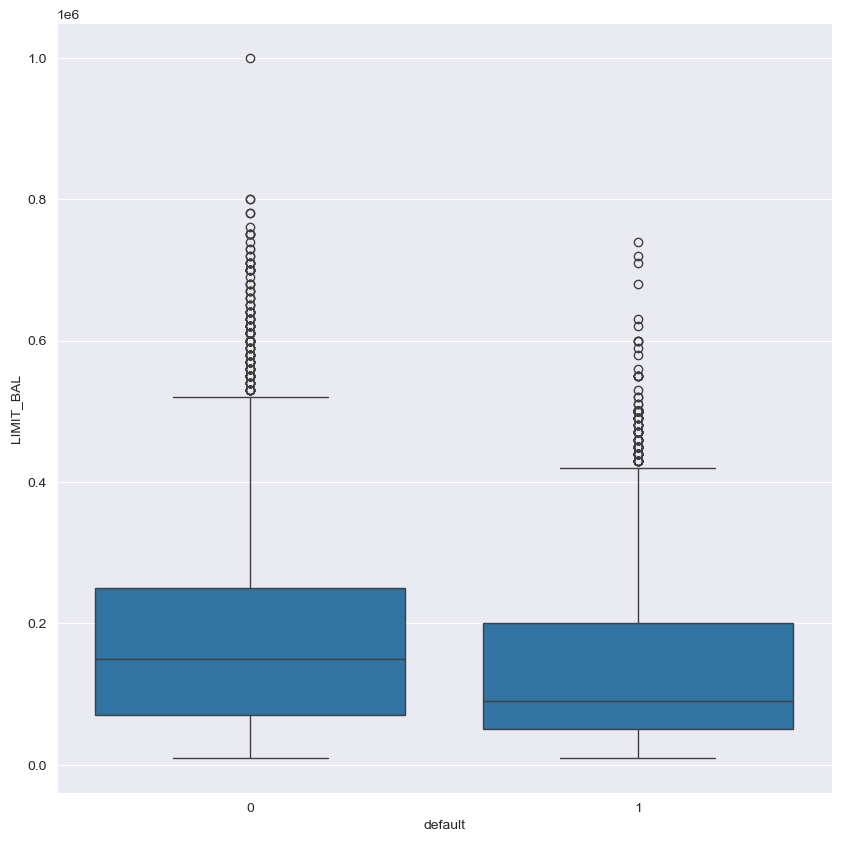

In [402]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='default', y='LIMIT_BAL', data=clients)

In [403]:
#df.rename(columns={'PAY_0','PAY_1'})

In [404]:
# age

clients['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [405]:
clients['AGE'] = clients['AGE'].astype(int)
day_clients = clients['AGE'].value_counts().reset_index()
day_clients.head()

,AGE,count
0,29,1605
1,27,1477
2,28,1409
3,30,1395
4,26,1256


<Axes: xlabel='AGE', ylabel='count'>

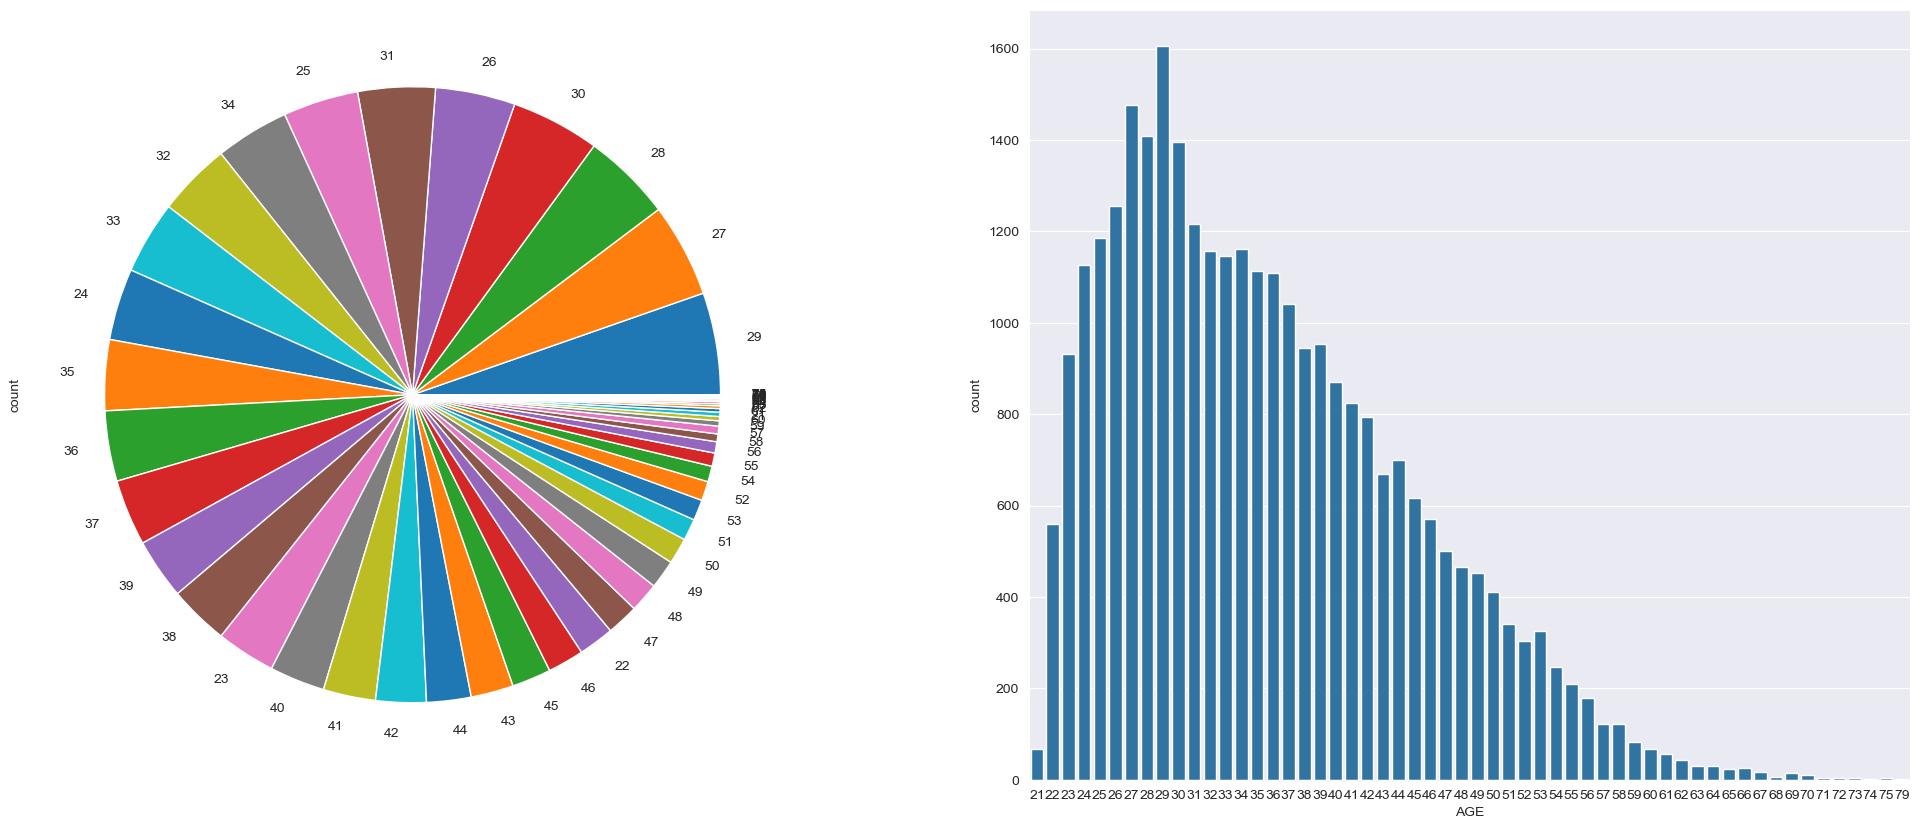

In [406]:
fig, axes = plt.subplots(ncols=2,figsize=(25,10))

clients['AGE'].value_counts().plot(kind='pie', ax=axes[0], subplots=True)
sns.barplot(x='AGE', y='count', data=day_clients,  ax = axes[1], orient='v')

In [407]:
clients.groupby('default')['AGE'].mean()

default
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [408]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int32
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [409]:
clients.astype('int')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


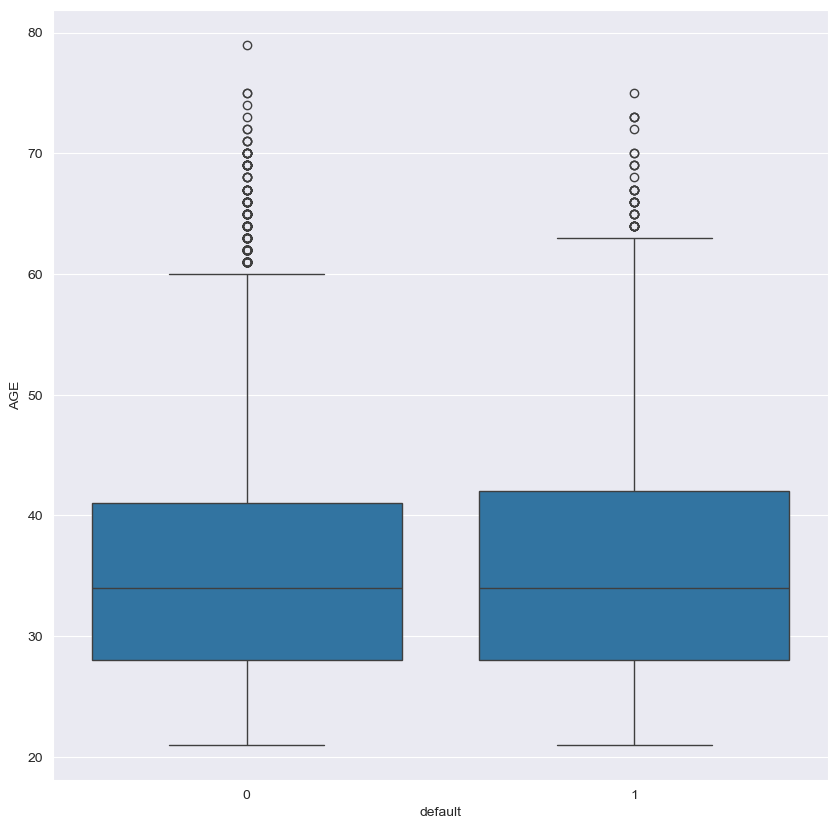

In [410]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='default', y='AGE', data=clients)

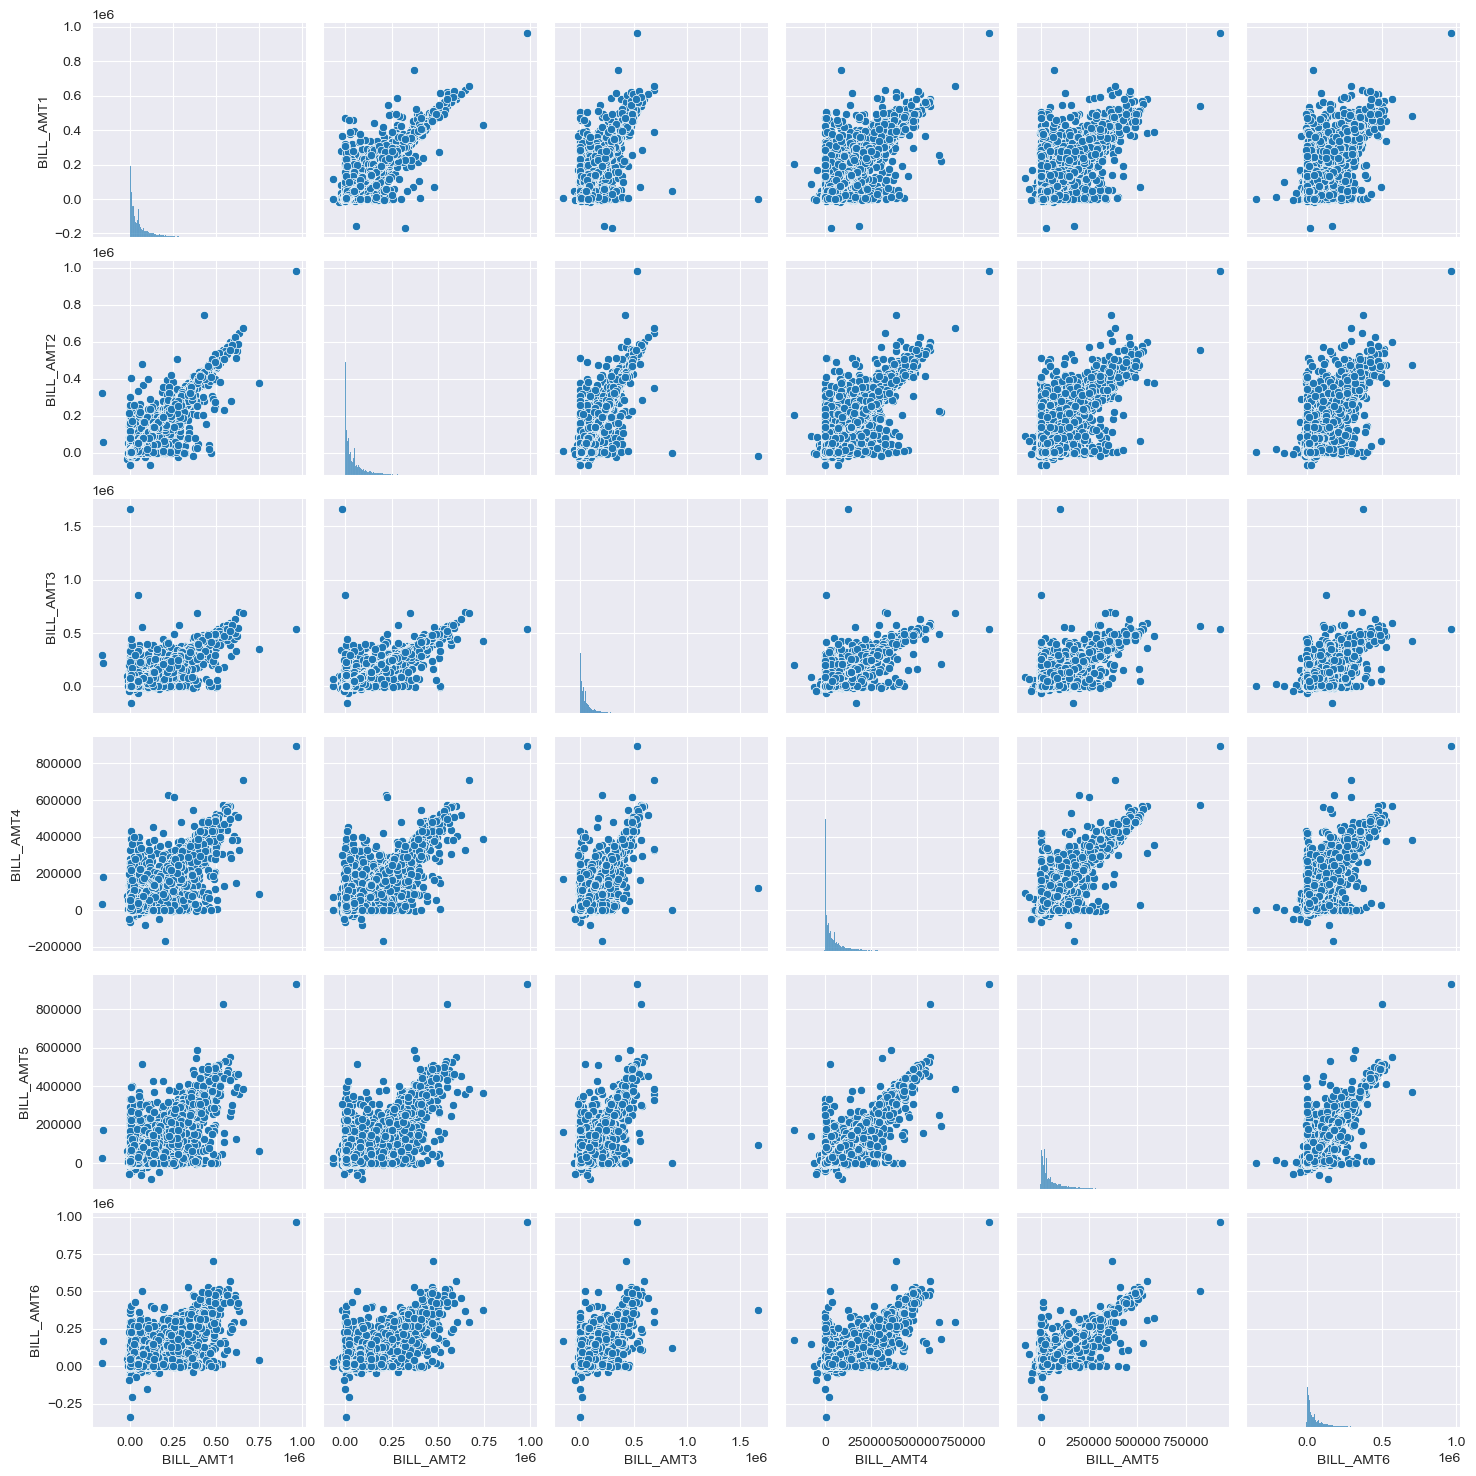

In [411]:
bill_amt_df = clients[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

sns.pairplot(bill_amt_df)

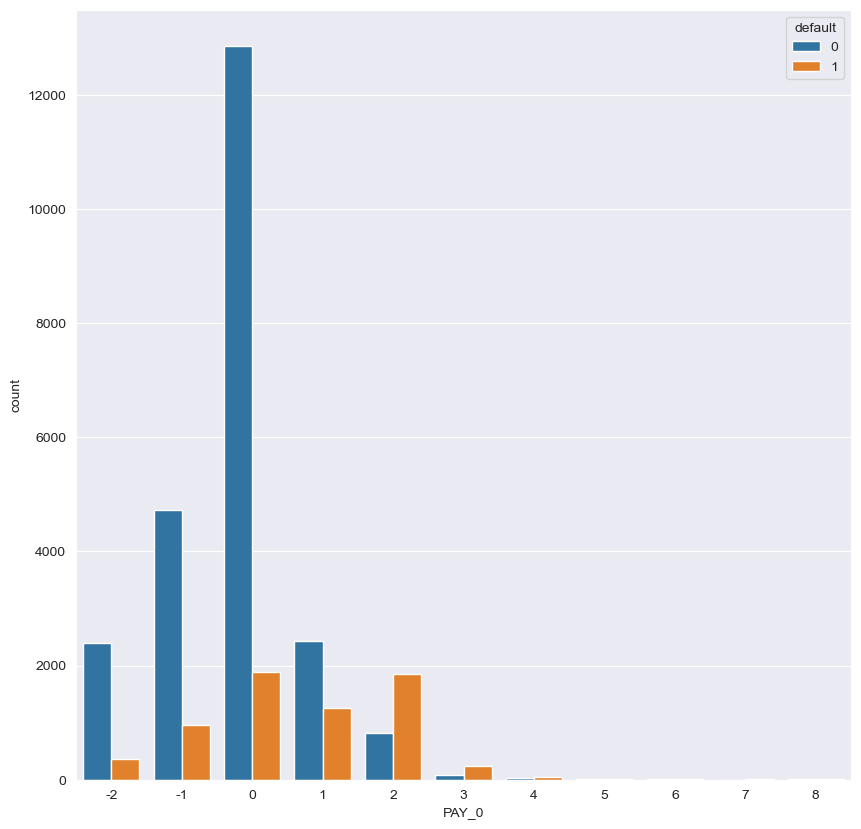

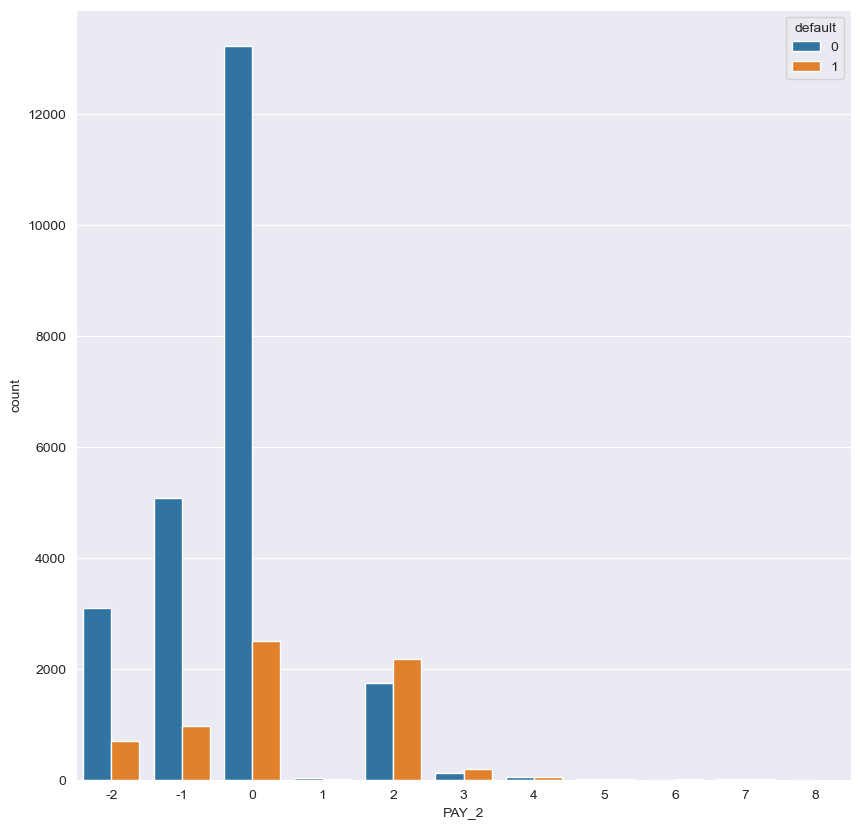

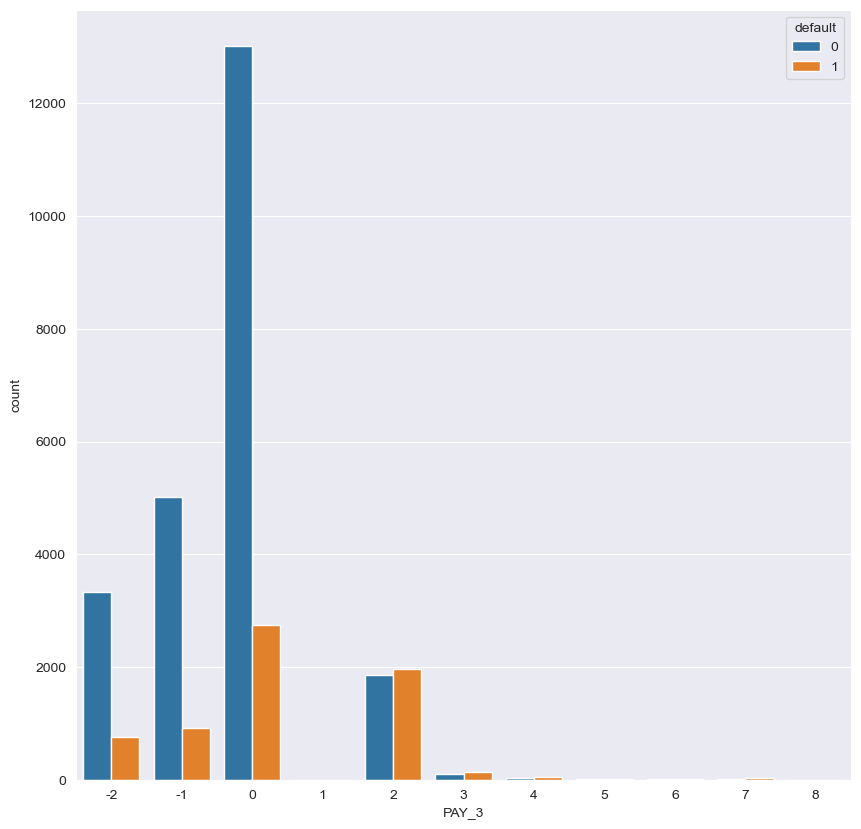

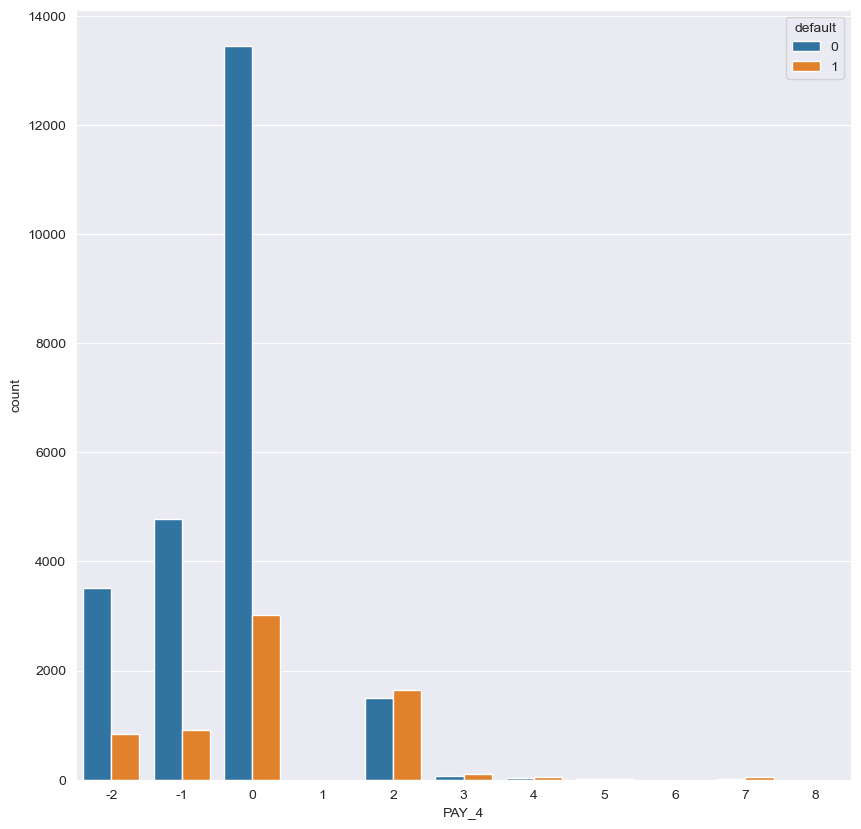

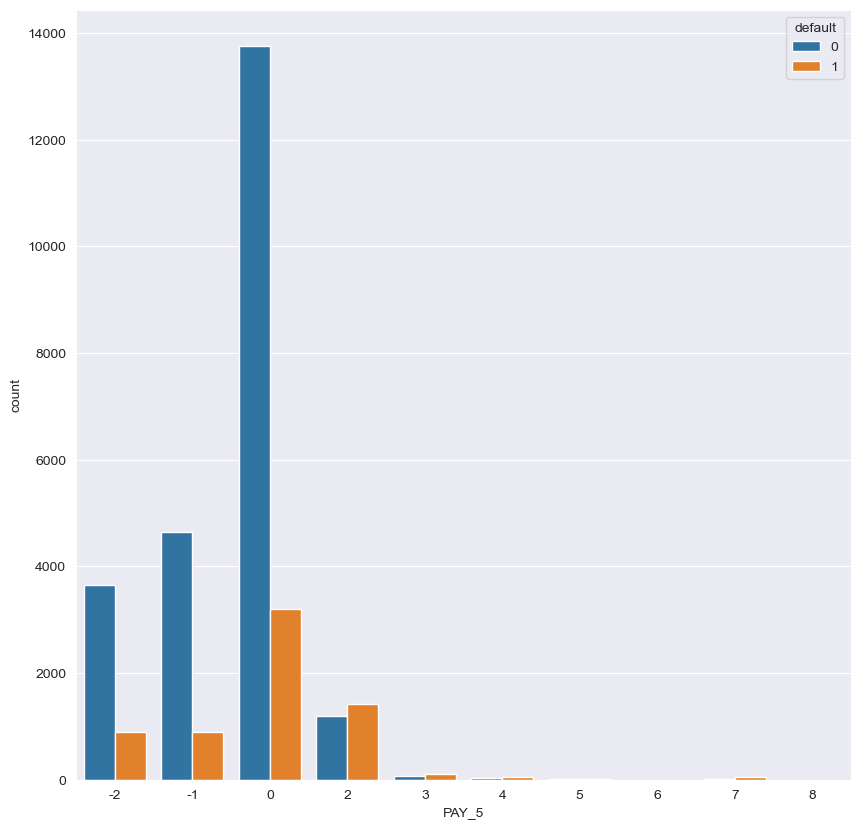

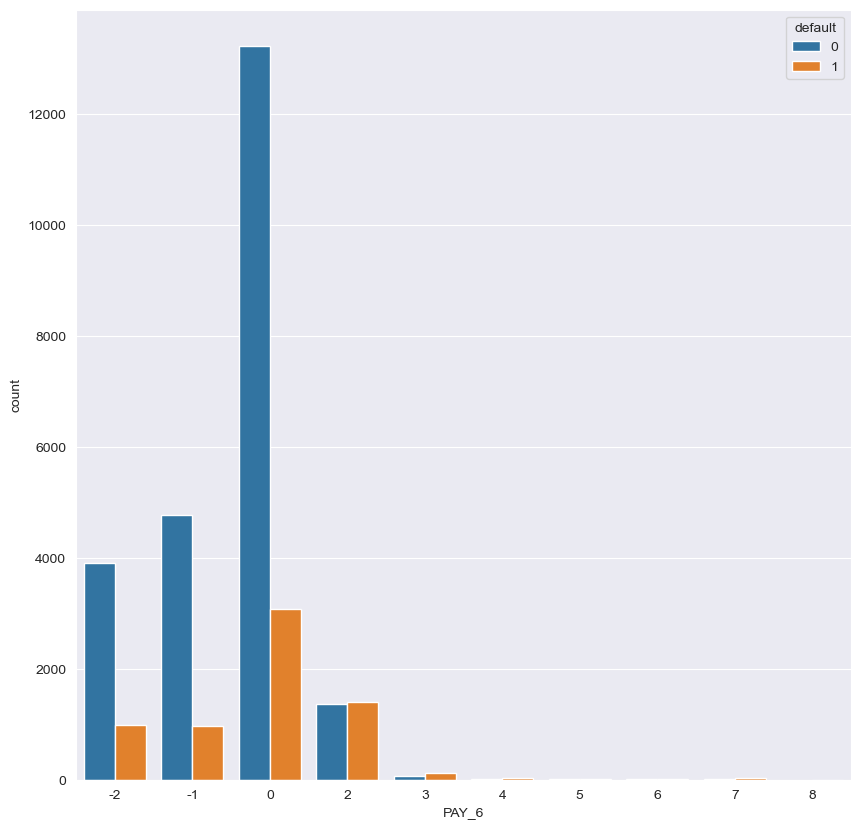

In [412]:
#History Payment

pay_col = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_col:
    plt.figure(figsize=(10,10))
    sns.countplot(x=col, data=clients, hue='default')

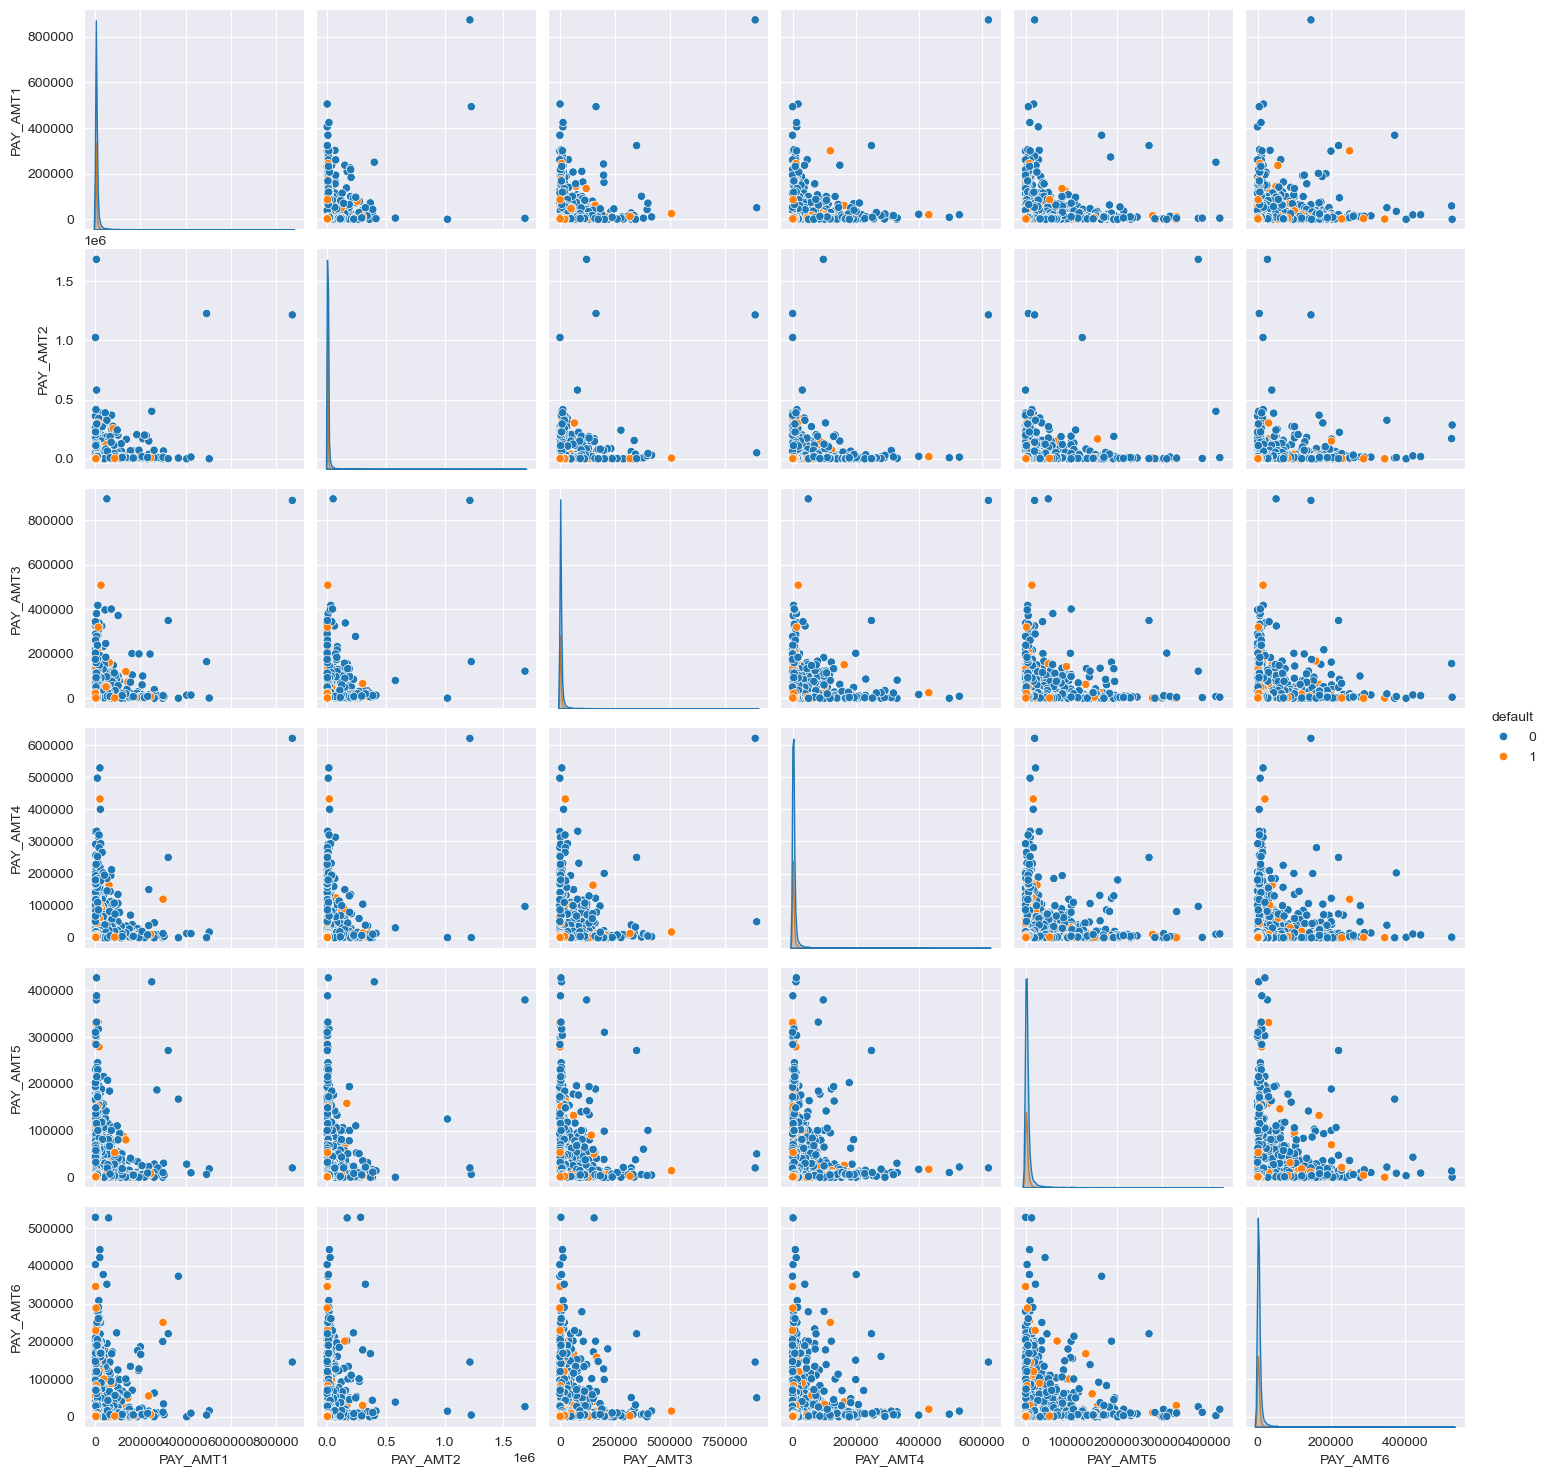

In [413]:
# Paid Amount

pay_amt_df = clients[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']]
sns.pairplot(pay_amt_df, hue='default')


In [414]:
clients.shape

(30000, 25)

In [415]:
#imbalance dataset
# SMOTE ( Synthetic Minority Oversampling Technique )

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(clients.iloc[:,0:-1], clients['default'])

print('Original dataset shape', len(clients))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [416]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,16196,20000,2,2,1,43,1,0,0,2,...,19865,19183,19985,19451,1089,2868,0,988,109,554
46724,5763,86881,1,2,1,39,1,0,0,0,...,22352,6994,-2,1988,1575,4001,4922,0,1990,209
46725,14195,50000,1,2,2,42,1,2,0,0,...,49818,49929,50293,49131,0,2413,1536,2407,1616,2009
46726,10553,50000,1,2,1,24,1,2,2,0,...,17869,17466,18451,14230,3594,1290,808,1203,811,1378


In [417]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default, Length: 46728, dtype: int64

In [418]:
columns = list(clients.columns)
columns.pop() # remote the last column

'default'

<Axes: xlabel='default', ylabel='count'>

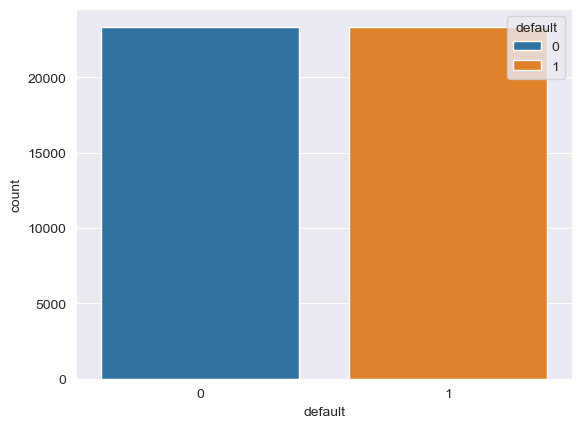

In [419]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['default'] = y_smote
#balance_df.head()
sns.countplot(data=balance_df, x='default', hue='default')

In [420]:
balance_df[balance_df['default']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,16196,20000,2,2,1,43,1,0,0,2,...,19183,19985,19451,1089,2868,0,988,109,554,1
46724,5763,86881,1,2,1,39,1,0,0,0,...,6994,-2,1988,1575,4001,4922,0,1990,209,1
46725,14195,50000,1,2,2,42,1,2,0,0,...,49929,50293,49131,0,2413,1536,2407,1616,2009,1
46726,10553,50000,1,2,1,24,1,2,2,0,...,17466,18451,14230,3594,1290,808,1203,811,1378,1


In [421]:
#Feature Engineering

df2 = clients.copy()

df2['PAYMENT_VALUE'] = df2['PAY_0'] + df2['PAY_2'] + df2['PAY_3'] + df2['PAY_4'] + df2['PAY_5'] + df2['PAY_6']
df2.groupby('default')['PAYMENT_VALUE'].mean()


default
0   -1.980140
1    2.023056
Name: PAYMENT_VALUE, dtype: float64

<Axes: xlabel='default', ylabel='PAYMENT_VALUE'>

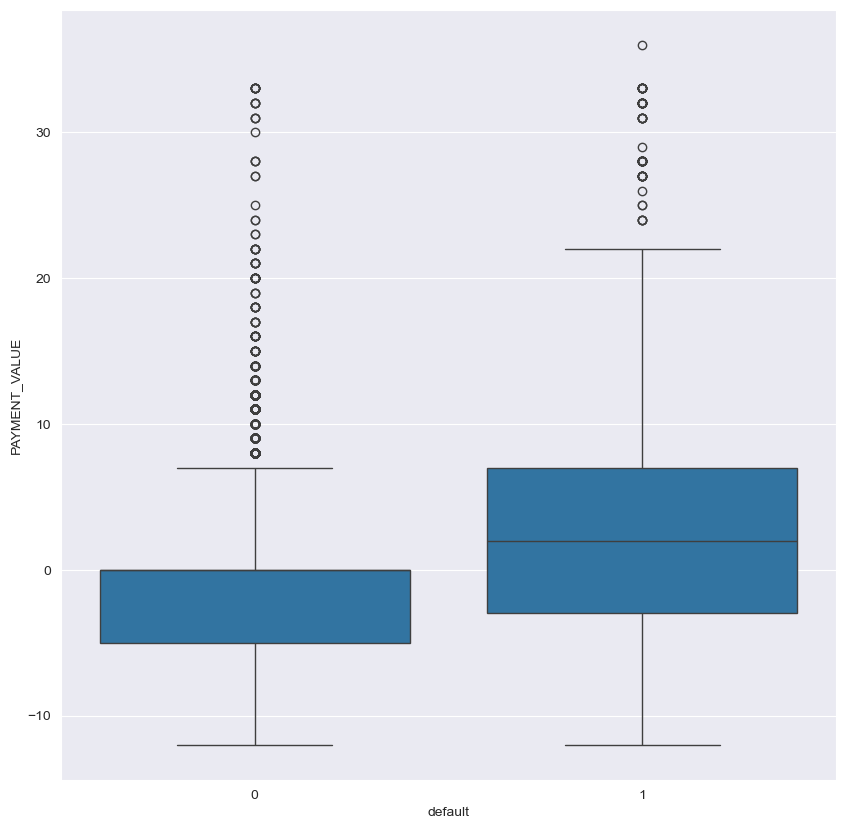

In [422]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default', y='PAYMENT_VALUE', data=df2)

In [423]:
df2['BILL_LEFT'] = (df2['BILL_AMT1']+df2['BILL_AMT2']+df2['BILL_AMT3']+df2['BILL_AMT4']+df2['BILL_AMT5']+df2['BILL_AMT6']) - (df2['PAY_AMT1']+df2['PAY_AMT2']+df2['PAY_AMT3']+df2['PAY_AMT4']+df2['PAY_AMT5']+df2['PAY_AMT6'])

In [424]:
df2.groupby('default')['BILL_LEFT'].mean()

default
0    237459.487203
1    240853.661844
Name: BILL_LEFT, dtype: float64

In [425]:
#Education

df2['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [426]:
#import numpy as np
#df2['EDUCATION'] = np.where(df2['EDUCATION']==6,4,df2['EDUCATION'])

In [427]:
#Marriage

df2['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [428]:
df2['SEX'].unique()

array([2, 1], dtype=int64)

In [429]:
df2.replace(
    {
        'SEX':{1:'MALE', 2:'FEMALE'}, 
        'EDUCATION':{1:'GRADUATE SCHOOL', 2:'UNIVERSITY', 3:'HIGH SCHOOL', 4:'OTHERS'},
        'MARRIAGE':{1:'MARRIED', 2:'SINGLE', 3:'OTHERS'},
    }, inplace=True)

In [430]:
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,PAYMENT_VALUE,BILL_LEFT
0,1,20000,FEMALE,UNIVERSITY,MARRIED,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7015
1,2,120000,FEMALE,UNIVERSITY,SINGLE,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,12077
2,3,90000,FEMALE,UNIVERSITY,SINGLE,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,90635
3,4,50000,FEMALE,UNIVERSITY,MARRIED,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,222946
4,5,50000,MALE,UNIVERSITY,MARRIED,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,50290


In [431]:
#One Hot Encoding

df2 = pd.get_dummies(df2, columns=['EDUCATION', 'MARRIAGE'])
df2.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default,PAYMENT_VALUE,BILL_LEFT,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_OTHERS,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,7015,False,False,False,True,True,False,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,12077,False,False,False,True,False,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,90635,False,False,False,True,False,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,222946,False,False,False,True,True,False,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,50290,False,False,False,True,True,False,False


In [432]:
df2.drop(['EDUCATION_OTHERS', 'MARRIAGE_OTHERS'], axis=1, inplace=True)


In [433]:
#df2 = pd.get_dummies(df2, columns=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], drop_first=True)

df2.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default,PAYMENT_VALUE,BILL_LEFT,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,0,0,1,-2,7015,False,False,True,True,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,0,2000,1,3,12077,False,False,True,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,1000,5000,0,0,90635,False,False,True,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,1069,1000,0,0,222946,False,False,True,True,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,689,679,0,-2,50290,False,False,True,True,False


In [434]:
# Label encoding for sex

encoders_nums = {
    "SEX": {"FEMALE":0, "MALE":1},
}
df2 = df2.replace(encoders_nums)

C:\Users\admin\AppData\Local\Temp\ipykernel_36588\2804126104.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace(encoders_nums)


In [435]:
df2.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default,PAYMENT_VALUE,BILL_LEFT,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,1,-2,7015,False,False,True,True,False
1,2,120000,0,26,-1,2,0,0,0,2,...,0,2000,1,3,12077,False,False,True,False,True
2,3,90000,0,34,0,0,0,0,0,0,...,1000,5000,0,0,90635,False,False,True,False,True
3,4,50000,0,37,0,0,0,0,0,0,...,1069,1000,0,0,222946,False,False,True,True,False
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,-2,50290,False,False,True,True,False


In [436]:
df2.drop('ID', axis=1, inplace=True)


In [437]:
df2.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,default,PAYMENT_VALUE,BILL_LEFT,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,-2,7015,False,False,True,True,False
1,120000,0,26,-1,2,0,0,0,2,2682,...,0,2000,1,3,12077,False,False,True,False,True
2,90000,0,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,90635,False,False,True,False,True
3,50000,0,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,222946,False,False,True,True,False
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,-2,50290,False,False,True,True,False


In [438]:
df2.to_csv('creditcard_mlp.csv', index=False)

In [439]:
df3 = pd.read_csv('creditcard_mlp.csv')
df3.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,default,PAYMENT_VALUE,BILL_LEFT,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,-2,7015,False,False,True,True,False
1,120000,0,26,-1,2,0,0,0,2,2682,...,0,2000,1,3,12077,False,False,True,False,True
2,90000,0,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,90635,False,False,True,False,True
3,50000,0,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,222946,False,False,True,True,False
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,-2,50290,False,False,True,True,False


In [440]:
df3.shape

(30000, 29)

In [441]:
# Logistic Regression

df_log_regression = df2.copy()
df_log_regression.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,default,PAYMENT_VALUE,BILL_LEFT,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,-2,7015,False,False,True,True,False
1,120000,0,26,-1,2,0,0,0,2,2682,...,0,2000,1,3,12077,False,False,True,False,True
2,90000,0,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,90635,False,False,True,False,True
3,50000,0,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,222946,False,False,True,True,False
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,-2,50290,False,False,True,True,False


In [442]:
X = df_log_regression.drop(['default','PAYMENT_VALUE', 'BILL_LEFT'], axis=1)

In [443]:
X.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,False,False,True,True,False
1,120000,0,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,False,False,True,False,True
2,90000,0,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,False,False,True,False,True
3,50000,0,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,False,False,True,True,False
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,False,False,True,True,False


In [444]:
y = df_log_regression['default']

In [445]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [446]:
columns = X.columns

In [447]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [448]:
clients.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [449]:
#Multi Layer Perceptron

In [450]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [451]:
cc_mlp = MLPClassifier(hidden_layer_sizes=(2), learning_rate_init=0.1, momentum=0.9, max_iter=1000)

df_balanced_training = 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

In [452]:
scaler = StandardScaler()
scaler.fit(X)

input_train_std = scaler.transform(X_train)
input_test_std = scaler.transform(X_test)

In [453]:
cc_mlp_trained = cc_mlp.fit(input_train_std, y_train)

In [454]:
cc_mlp_predict = cc_mlp.predict(input_test_std)

In [455]:
print(cc_mlp_predict)

print(type(cc_mlp_trained))

[0 0 0 ... 0 0 1]
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>


In [456]:
y_test.head()

26653    0
19017    0
5974     0
11072    1
5482     0
Name: default, dtype: int64

In [457]:
from sklearn.metrics import accuracy_score

cc_accuracy = accuracy_score(y_test, cc_mlp_predict)
print("%.2f"%(cc_accuracy*100))

81.74


In [458]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, cc_mlp_predict)
print("%.2f"%(kappa))

0.38


In [459]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, cc_mlp_predict)

array([[6601,  408],
       [1235,  756]], dtype=int64)

In [460]:
print(classification_report(y_test, cc_mlp_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [461]:
!pip install scipy

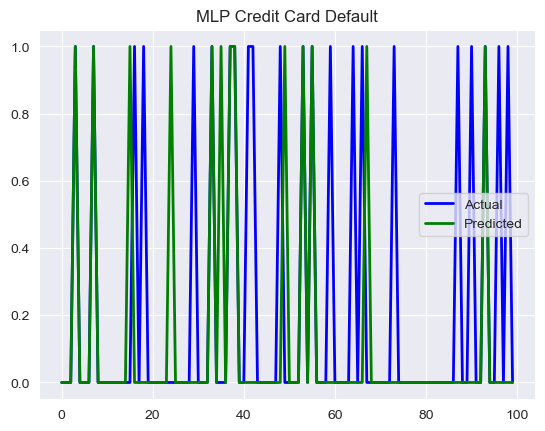

In [462]:
import matplotlib.pyplot as plt
X = range(0, len(y_test[:100]))
plt.figure()
plt.plot(X, y_test[:100], label='Actual', color='blue', linewidth=2)
plt.plot(X, cc_mlp_predict[:100], label='Predicted', color='green', linewidth=2)
plt.title('MLP Credit Card Default')
plt.legend()
plt.show()

In [463]:
# Perceptron

In [464]:
from sklearn.linear_model import Perceptron

the_perceptron = Perceptron(max_iter=1000, eta0=0.1, tol=0.00001)

trained = the_perceptron.fit(input_train_std, y_train)

predicted = trained.predict(input_test_std)

predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [465]:
from sklearn.metrics import accuracy_score

pct_accuracy = accuracy_score(y_test, predicted)

print('%.2f%%' % (pct_accuracy*100))

69.28%


In [466]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, predicted)

print('%.2f'%kappa)

0.06


In [467]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, predicted)

array([[5781, 1228],
       [1537,  454]], dtype=int64)

In [468]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      7009
           1       0.27      0.23      0.25      1991

    accuracy                           0.69      9000
   macro avg       0.53      0.53      0.53      9000
weighted avg       0.67      0.69      0.68      9000



In [469]:
#Logistic Regression

In [470]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(input_train_std, y_train)

LogisticRegression()

In [471]:
model.intercept_

array([-1.47391158])

In [472]:
model.coef_

array([[-0.11033418,  0.07510315,  0.05849021,  0.6591845 ,  0.100355  ,
         0.07142089,  0.05034757,  0.01036301,  0.03633484, -0.3365048 ,
         0.06764935,  0.15960922, -0.05474691,  0.03249901,  0.05734992,
        -0.18646251, -0.19962967, -0.03006355, -0.0684963 , -0.05705144,
        -0.01956529,  0.62877947,  0.45384523,  0.62953988,  0.13733878,
         0.05312782]])

In [473]:
y_pred = model.predict(input_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [474]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

pct_accuracy = accuracy_score(y_test, y_pred)
print('%.2f%%' % (pct_accuracy*100))

80.92%


In [475]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print('%.2f'%kappa)

0.28


In [476]:
from sklearn.metrics import confusion_matrix, classification_report

In [477]:
confusion_matrix(y_test, y_pred)

array([[6786,  223],
       [1494,  497]], dtype=int64)

In [478]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.69      0.25      0.37      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.61      0.63      9000
weighted avg       0.79      0.81      0.77      9000

